92
0.9968013900460705
0.0
0.0


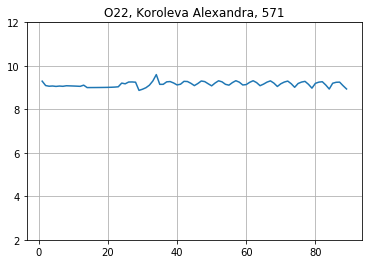

In [5]:
import math as m
import matplotlib.pyplot as plt
import numpy as np



rMIN = 0
rMAX = 1.8
a = 0.6
b = 1.2

I = 200
d = 1
C = 0.9
c = 1.5                                                                                                       
N = 0.5
h = (rMAX - rMIN) / I
t = C * h / c
nt = int(N / t)
r = [rMIN + (i - 0.5)*h for i in range(I + 2)]

def u(I):
    rMIN = 0
    rMAX = 1.8
    a = 0.6
    b = 1.2

    c = 1.5                                                                                                       
    C = 0.8
    d = 1

    N = 0.5
    h = (rMAX - rMIN) / I
    t = C * h / c
    nt = int(N / t)

    def v0(r):
        if (r < b) & (r > a):
            return m.exp((-4*(2*r - (a + b))**2) / ((b - a)**2 - (2*r - (a + b))**2))
        else:
            return 0

    r = [rMIN + (i - 0.5)*h for i in range(I + 2)]

    a1 = [t**2 * c**2 * r[i]**(1-d) / h for i in range(I + 2)]
    a2 = [(r[i] + h/2)**(d-1) / h for i in range(I + 2)]
    a3 = [(r[i] - h/2)**(d-1) / h for i in range(I + 2)]

    u0 = [v0(r[i]) for i in range(I + 2)]
    u1 = u0.copy()

    u_next = [0 for i in range(I + 2)]

    u11 = [0 for i in range(I + 2)]
    u12 = [0 for i in range(I + 2)]
    u13 = [0 for i in range(I + 2)]
    for i in range(1, I + 1):
        u12[i] = a1[i] * (a2[i] * (u0[i + 1] - u0[i]) - a3[i] * (u0[i] - u0[i - 1]))

    for i in range(1, I + 2):
        u1[i] = u0[i] + 0.5 * u12[i]
    print(u1[100])

    u_prev = u0.copy()
    u_curr = u1.copy()


    sol = [[0 for i in range(I)] for n in range(nt)]
    sol[0] = u0[1:I+1]
    for n in range(1, nt):
        sol[n] = u_curr[1:I + 1]
        for i in range(1, I + 1):
            u_next[i] = 2*u_curr[i] - u_prev[i] + a1[i] * (a2[i] * (u_curr[i + 1] - u_curr[i]) - a3[i] * (u_curr[i] - u_curr[i - 1]))

        u_prev = u_curr.copy()
        u_curr = u_next.copy()

        u_curr[0] = u_curr[1]
        u_curr[I + 1] = u_curr[I]

    return sol

def NT(I1):
    h1 = (rMAX - rMIN) / I1
    t1 = C * h1 / c
    nt1 = int(N / t1)
    return nt1

nt1 = NT(200)
nt2 = NT(600)
nt3 = NT(3*600)

print(nt1)

u1 = u(200)
u2 = u(600)
u3 = u(600*3)

nt = nt1 - 2

d1 = [[0 for i in range(I)] for n in range(nt)]
d2 = [[0 for i in range(I)] for n in range(nt)]
for n in range(nt):
    for i in range(I):
        j = 3*i + 1
        k = 9*i + 4
        d1[n][i] = abs(u1[n][i] - u2[3*n][j])
        d2[n][i] = abs(u2[3*n][j] - u3[9*n][k])


u1m = [0 for i in range(nt)]
u2m = [0 for i in range(nt)]
for n in range(nt):

    u1m[n] = max(d1[n])
    u2m[n] = max(d2[n])

alpha = []
for n in range(1, nt):
    alpha.append(u1m[n] / u2m[n])

time = [n for n in range(1, nt)]
plt.ylim(2, 12)
plt.grid()
plt.title("O22, Kochiev Leon, 571")
plt.plot(time, alpha)
plt.show()
